**QF 600 - Gabriel Woon (01292595)**

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Import Data

In [2]:
data = pd.read_csv('Industry_Portfolios.csv')
data = data.drop('Date', axis=1)

## Calculate the Key Statistics

In [3]:
# column vector of mean returns 
muvec = data.mean(); muvec

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [4]:
# column vector of standard deviation
sigmavec = data.std(); sigmavec

NoDur    3.345657
Durbl    8.361852
Manuf    5.310270
Enrgy    6.081524
HiTec    5.381191
Telcm    4.448284
Shops    4.093786
Hlth     3.787172
Utils    3.701763
Other    5.582452
dtype: float64

In [5]:
# table of mean returns and standard deviation
pd.merge(pd.DataFrame(muvec,columns=["Mean Returns"]),pd.DataFrame(sigmavec,columns=["Standard Deviation"]),
         left_index=True,right_index=True)

,Mean Returns,Standard Deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [6]:
# covariance matrix of returns
cov = np.cov(data, rowvar=False)
display(np.round(data.cov(), decimals=5))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.19342,18.44967,14.10491,10.53134,12.92295,11.96808,10.17083,9.95311,7.86665,14.43841
Durbl,18.44967,69.92058,39.17810,27.01979,35.46665,27.49054,27.44473,16.82400,12.74614,39.36199
Manuf,14.10491,39.17810,28.19897,23.14538,24.61874,19.55015,17.62287,13.59645,11.44061,26.31342
Enrgy,10.53134,27.01979,23.14538,36.98493,19.26728,15.36682,11.29780,9.63033,14.02717,18.32047
HiTec,12.92295,35.46665,24.61874,19.26728,28.95722,18.70827,17.83711,13.25406,10.30419,23.85547
Telcm,11.96808,27.49054,19.55015,15.36682,18.70827,19.78723,14.16936,11.50660,10.99160,19.61084
Shops,10.17083,27.44473,17.62287,11.29780,17.83711,14.16936,16.75908,10.17885,6.69435,19.22652
Hlth,9.95311,16.82400,13.59645,9.63033,13.25406,11.50660,10.17885,14.34267,7.47504,14.86455
Utils,7.86665,12.74614,11.44061,14.02717,10.30419,10.99160,6.69435,7.47504,13.70305,9.99296
Other,14.43841,39.36199,26.31342,18.32047,23.85547,19.61084,19.22652,14.86455,9.99296,31.16377


## Formularize the Variables

In [7]:
# V-1 = inverse matrix of covariance
vinv = np.linalg.inv(cov)

# R = column vector of mean returns 
muVEC = muvec

# e = n x 1 column vector of ones
ones = np.ones(len(muvec))

# delta = δ = e′V−1e
delta = ones.T@vinv@ones

# alpha = α = R′V−1e
alpha = muVEC.T@vinv@ones

# zeta = ζ = R′V−1R
zeta = muvec.T@vinv@muvec

# a = 1st unknown for weights 
a = (zeta*vinv@ones - alpha*vinv@muvec)/(zeta*delta-alpha**2)

# b = 2nd unknown for weights
b = (delta*vinv@muvec - alpha*vinv@ones)/(zeta*delta-alpha**2)

## Calculate the Minimum Variance Portfolio (MV)

In [8]:
# minimum variance portfolio returns
muMV = alpha/delta; muMV

1.0040443340832625

In [9]:
# minimum variance portfolio standard deviation
sigmaMV = (1/delta)**0.5; sigmaMV

2.697902407534036

In [10]:
# minimum variance portfolio weights
wMV = a+b*muMV
display(pd.DataFrame(wMV.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.543536,-0.109556,-0.15107,0.066282,-0.073712,-0.149203,0.589276,0.142921,0.315347,-0.173823


## Build the Minimum Variance Frontier (MVF)

In [11]:
# minimum variance frontier portfolios returns (from 0 to 2% with 0.05% incremental)
muMVF = np.arange(0, 2.01 , 0.05); muMVF

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [12]:
# minimum variance frontier portfolios standard deviation (from 0 to 2% with 0.05% incremental)
sigmaMVF = ((1/delta)+(delta/(zeta*delta-alpha**2))*(muMVF-muMV)**2)**0.5; sigmaMVF

array([4.96865933, 4.79550523, 4.62520378, 4.4580819 , 4.29451081,
       4.13491193, 3.97976317, 3.82960543, 3.68504889, 3.54677848,
       3.41555771, 3.29222964, 3.17771336, 3.07299416, 2.97910534,
       2.89710007, 2.82801233, 2.77280783, 2.73232821, 2.70723407,
       2.69795476, 2.70465304, 2.7272112 , 2.76524112, 2.81811651,
       2.88502123, 2.96500574, 3.05704354, 3.16008166, 3.27308136,
       3.39504812, 3.52505129, 3.66223513, 3.80582321, 3.9551181 ,
       4.10949786, 4.26841081, 4.43136928, 4.59794314, 4.76775349,
       4.94046659])

In [13]:
# efficient frontier portfolios data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muMVF, columns=["Returns"]), pd.DataFrame(sigmaMVF, columns=["Standard Deviation"])), axis = 1)

,Returns,Standard Deviation
0,0.00,4.968659
1,0.05,4.795505
2,0.10,4.625204
3,0.15,4.458082
4,0.20,4.294511
5,0.25,4.134912
6,0.30,3.979763
7,0.35,3.829605
8,0.40,3.685049
9,0.45,3.546778


## Plot the Minimum Variance Portfolio (MV) & Minimum Variance Frontier (MVF)

<ipython-input-14-e5e0337ee2f8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


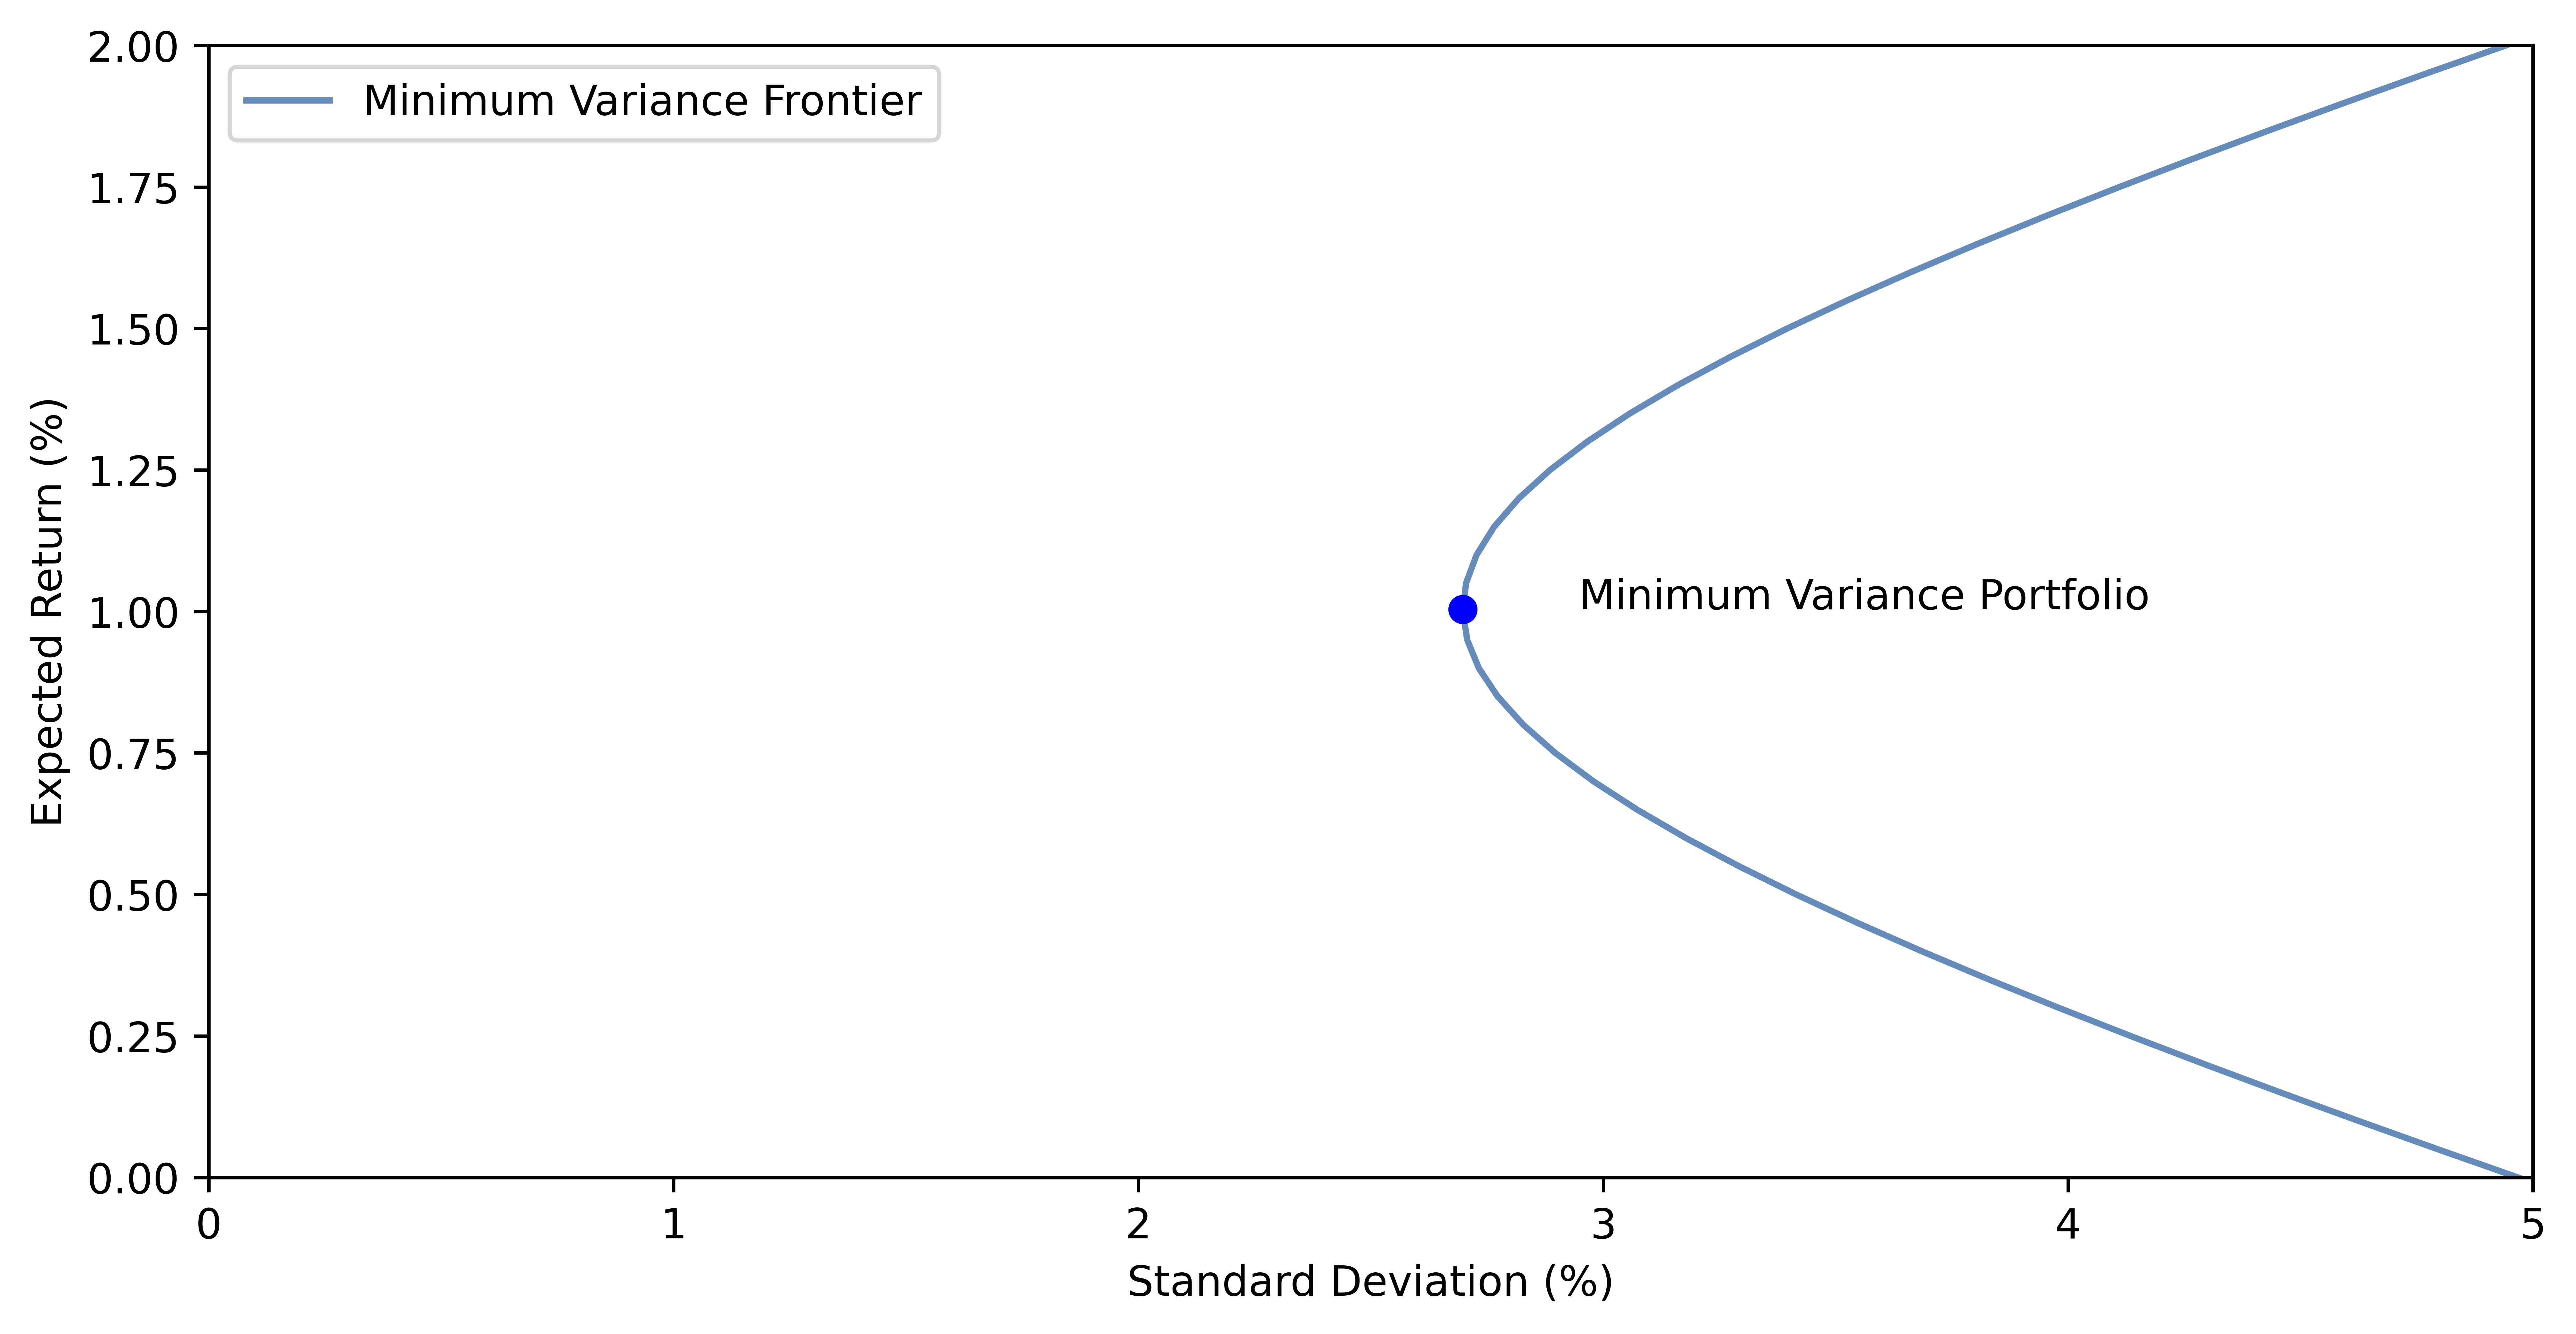

In [14]:
plt.figure(figsize = (10, 5), dpi = 900)

plt.plot(sigmaMVF ,muMVF,'xkcd:faded blue')
plt.plot(sigmaMV ,muMV,'bo')
plt.text(sigmaMV+0.25, muMV, "Minimum Variance Portfolio")

plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.legend(["Minimum Variance Frontier"], loc=2)

axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,2])
ax = plt.axes()

## Calculate the Tangency Portfolio (TAN)

In [15]:
# risk free rate
Rf = 0.13

In [16]:
# tangency portfolio returns
muTAN = ((alpha*Rf)-zeta)/((delta*Rf)-alpha); muTAN

1.4862735358446901

In [17]:
# tangency portfolio standard deviation
sigmaTAN = -(zeta-2*alpha*Rf+(delta*Rf**2))**0.5/(delta*(Rf-muMV)); sigmaTAN

3.360726330566364

In [18]:
#tangency portfolio weights
wTAN = a+b*muTAN
display(pd.DataFrame(wTAN.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.567972,-0.214073,0.714105,0.104087,-0.363438,-0.095463,0.991647,0.07557,0.132643,-0.913051


In [19]:
# tangency portfolio sharpe ratio
srTAN = (zeta-2*alpha*Rf+delta*Rf**2)**0.5 ; srTAN

0.4035655993495088

## Build the Efficient Frontier (EF)

In [20]:
# efficient frontier portfolios returns (from 0 to 2% with 0.05% incremental)
muEF = muMVF[muMVF>=Rf]; muEF

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65,
       0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ,
       1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75,
       1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [21]:
# efficient frontier portfolios standard deviation (from 0 to 2% with 0.05% incremental)
sigmaEF = ((muEF-Rf)**2/(zeta-2*alpha*Rf+delta*Rf**2))**0.5; sigmaEF

array([0.04955824, 0.17345383, 0.29734943, 0.42124502, 0.54514062,
       0.66903621, 0.79293181, 0.9168274 , 1.040723  , 1.16461859,
       1.28851419, 1.41240978, 1.53630538, 1.66020097, 1.78409657,
       1.90799216, 2.03188776, 2.15578335, 2.27967895, 2.40357454,
       2.52747014, 2.65136573, 2.77526133, 2.89915692, 3.02305251,
       3.14694811, 3.2708437 , 3.3947393 , 3.51863489, 3.64253049,
       3.76642608, 3.89032168, 4.01421727, 4.13811287, 4.26200846,
       4.38590406, 4.50979965, 4.63369525])

In [22]:
# efficient frontier portfolios data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muEF, columns=["Returns"]), pd.DataFrame(sigmaEF, columns=["Standard Deviation"])), axis = 1)

,Returns,Standard Deviation
0,0.15,0.049558
1,0.20,0.173454
2,0.25,0.297349
3,0.30,0.421245
4,0.35,0.545141
5,0.40,0.669036
6,0.45,0.792932
7,0.50,0.916827
8,0.55,1.040723
9,0.60,1.164619


## Plot the Tangency Portfolio (T) & Efficient Frontier (EF)

<ipython-input-23-ab21865189c3>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


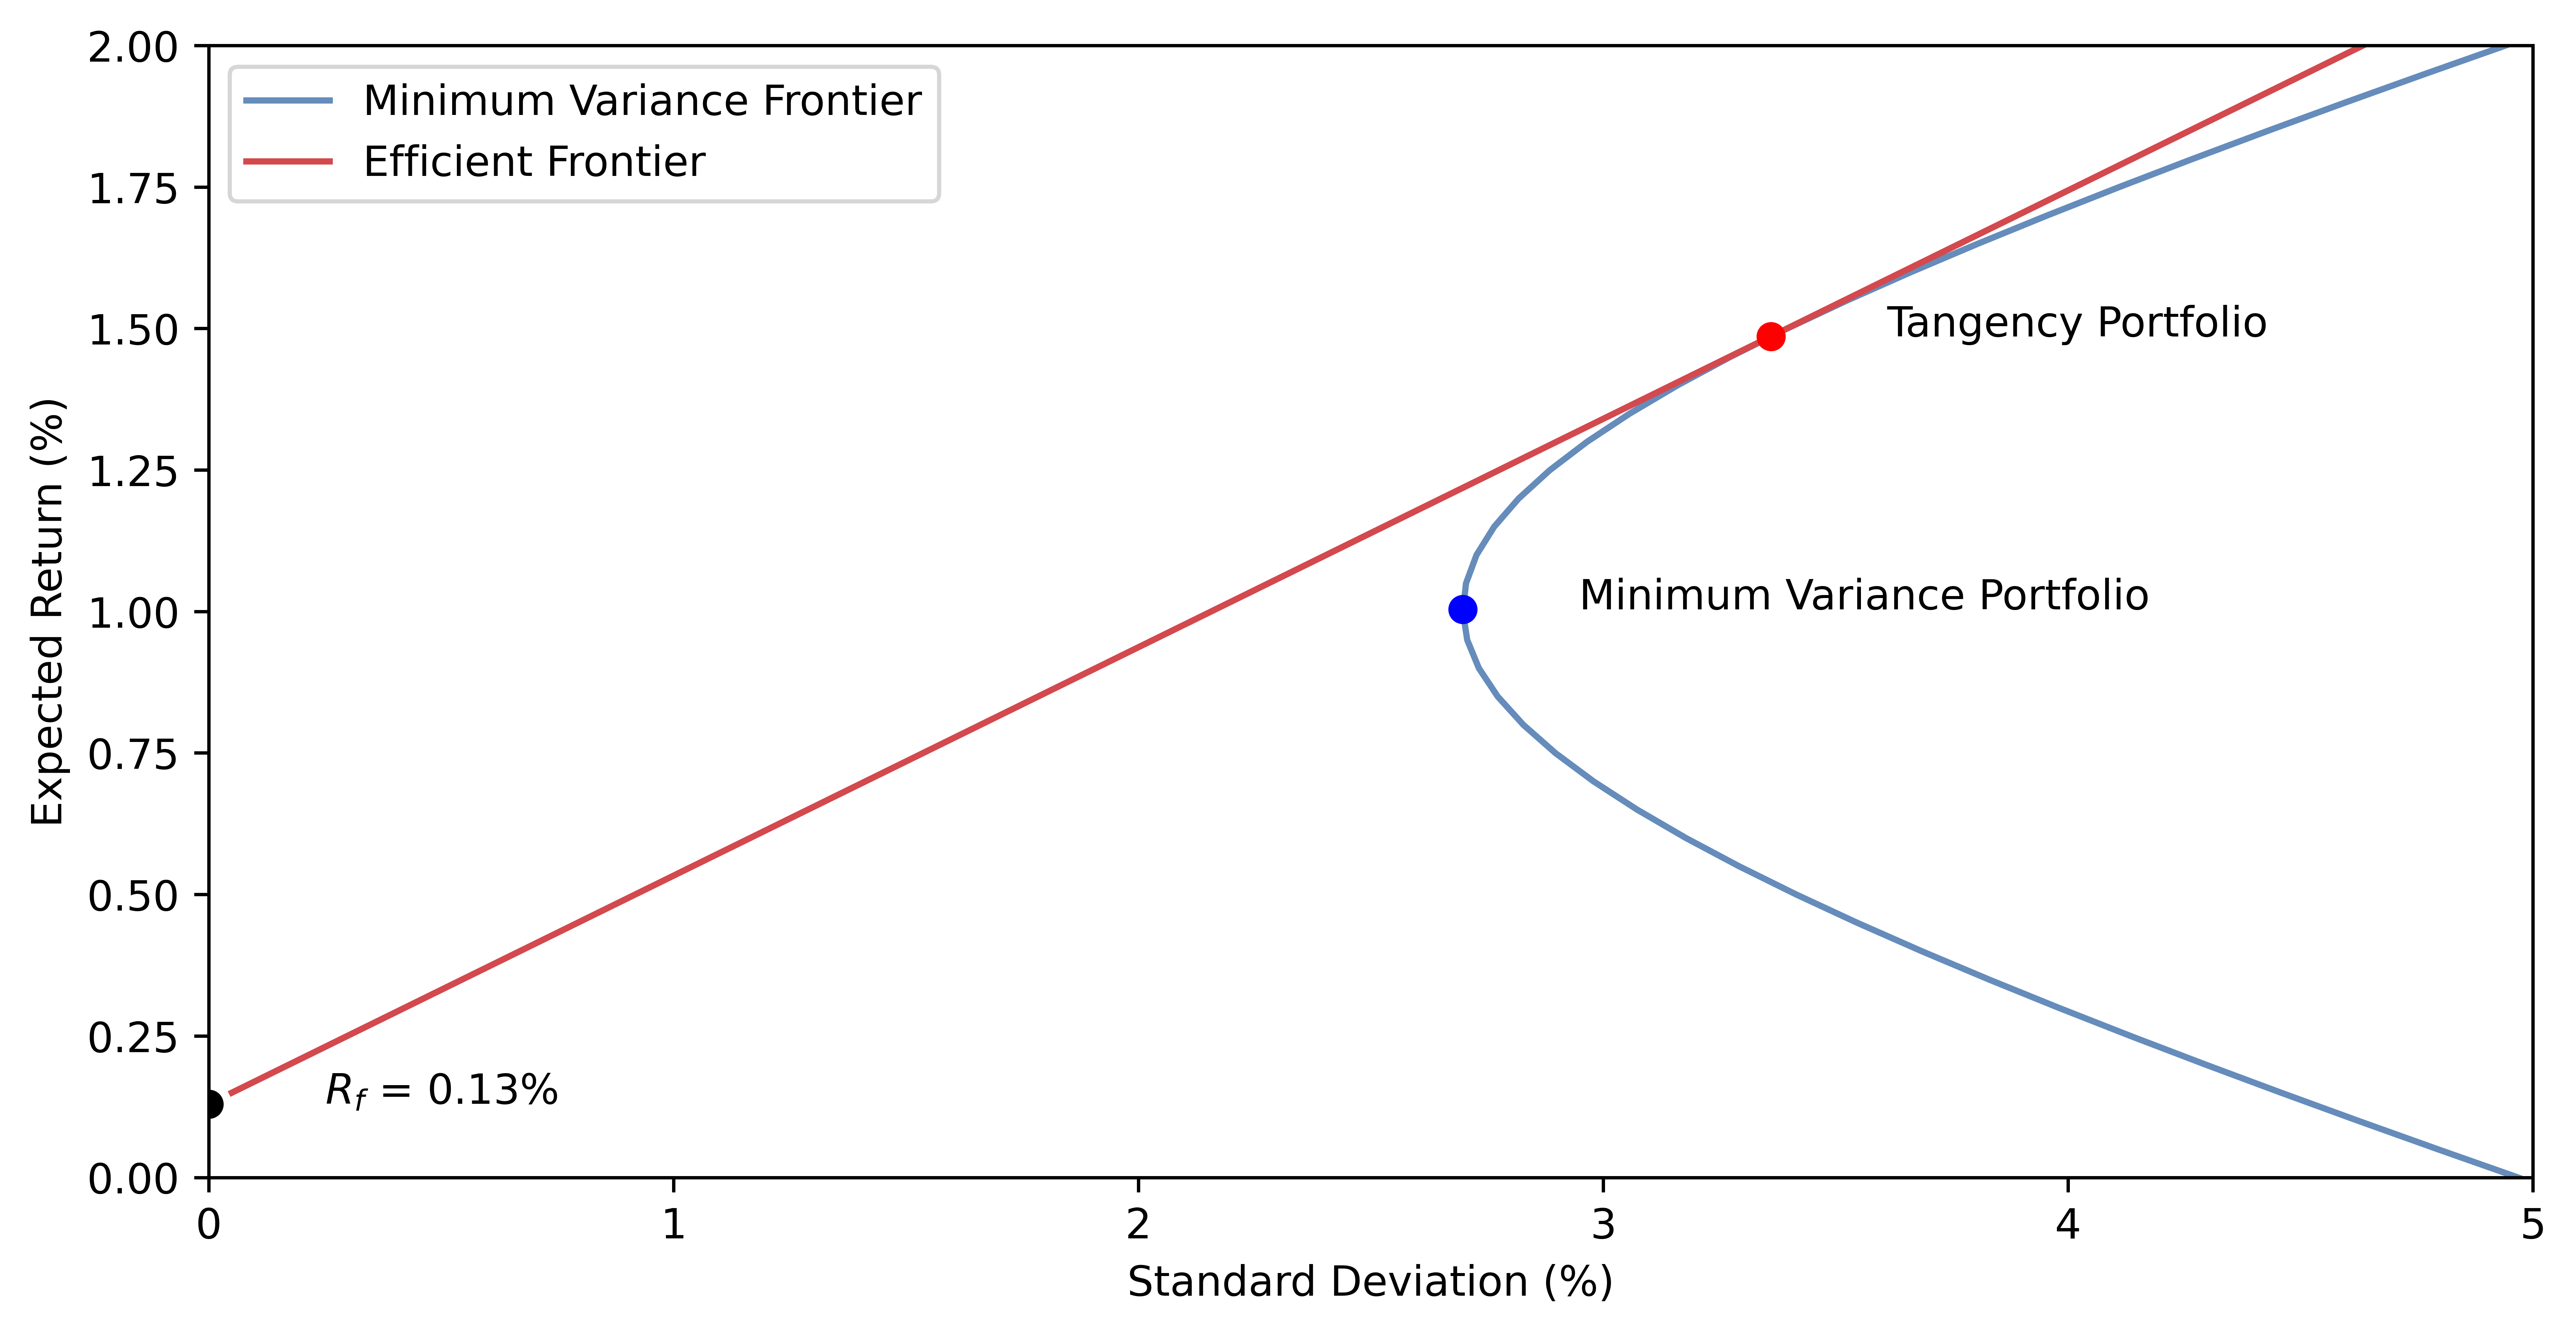

In [23]:
plt.figure(figsize = (10, 5), dpi = 900)
plt.plot(sigmaMVF, muMVF,'xkcd:faded blue')
plt.plot(sigmaEF, muEF,'xkcd:faded red')
plt.plot(sigmaMV, muMV,'bo')
plt.plot(sigmaTAN, muTAN, 'ro')
plt.plot(0, Rf, 'ko')

plt.text(sigmaMV+0.25, muMV, "Minimum Variance Portfolio")
plt.text(sigmaTAN+0.25, muTAN, "Tangency Portfolio")
plt.text(0.25,Rf,r'$R_{f}$' ' = 0.13%',fontsize=10)

plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.legend(["Minimum Variance Frontier", "Efficient Frontier"], loc=2)

axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,2])
ax = plt.axes()

# Economic Significance

**Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor**

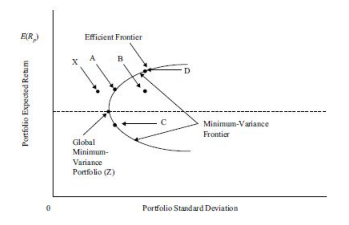

In [24]:
# minimum variance frontier example
Minimum_Variance_Frontier = mpimg.imread('Minimum Variance Frontier.jpg')
imgplot = plt.imshow(Minimum_Variance_Frontier)
plt.axis('off')
plt.show()

Risk-averse investors seek to minimize risk for a given return. 

For a given return (Points A, B & X - **same horizontal line**):  
Point X has the lowest risk; however it is not attainable because it does not lie within the investment opportunity set.  
Point B and all points to the right of Point A are feasible, but they have higher risk (inferior to Point A).  
Therefore, a risk-averse investor will choose only Point A in preference to any other portfolio with the same return.

For a given risk (Point A & C - **same vertical line**):  
Point C and all points below of Point A have a lower return (inferior to Point A).  
Therefore, a risk-averse investor will choose only Point A in preference to any other portfolio with the same risk.

Conclusion:  
No risk-averse investor will choose to invest in a portfolio to the right of the minimum-variance frontier because a portfolio on the minimum-variance frontier can give the same return but at a lower risk.  
No risk-averse investor will choose to invest in a portfolio below the minimum variance portfolio (Point Z) because a portfolio on the minimum-variance frontier can give the same risk but at a higher return.


**Briefly explain the economic significance and relevance of the efficient frontier to an investor**

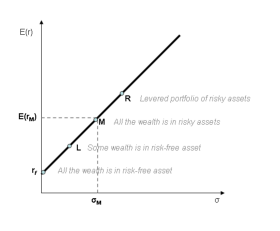

In [25]:
# efficient frontier example
Efficient_Frontier = mpimg.imread('Efficient Frontier.png')
imgplot = plt.imshow(Efficient_Frontier)
plt.axis('off')
plt.show()

Easy Optimized Portfolio Creation (with only "2" asset):  
An investor can easily create a portfolio that maximize their utility by combining the risk free asset and the tangency portfolio (Portfolio M).  
To create at Point L (or any points between Rf and Portfolio M), the investor combines different weightage of Rf and Portfolio M.  
To create at Point R (or any points beyond Portfolio M), the investor will leverage Portfolio M.  
As the investor moves up the Efficient Frontier, the weightage on Rf decreases to the point that it is leveraged (negative) while weightage on Portfolio M increases.

**Briefly explain the economic significance and relevance of the tangency portfolio to an investor**

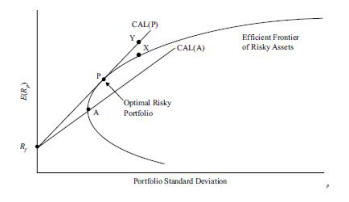

In [26]:
# tangency portfolio example
Tangency_Portfolio = mpimg.imread('Tangency Portfolio.jpg')
imgplot = plt.imshow(Tangency_Portfolio)
plt.axis('off')
plt.show()

Optimal Portfolio:  
Comparing Point A and Point P, it is clear that Portfolio P can give the highest sharpe ratio and maximizes risk/return when combining a risk free asset and a risky portfolio on the minimum variance frontier.  
This portfolio is optimal because the slope of efficient frontier is the highest (sharpe ratio), which means that it achieves the highest returns per additional unit of risk thereby maximizing performance.  
In other words, it helps to create the efficient frontier that has superior risk-return profiles to any other portfolios that exists.